In [1]:
import statsmodels.stats.power as smp

# Parameters for the power analysis
effect_size = 0.5  # Medium effect size (Cohen's d)
alpha = 0.05       # Significance level
power = 0.8        # Desired power (80%)

# Calculate the required sample size per group
sample_size = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

print(f"Required sample size per group: {sample_size:.2f}")

Required sample size per group: 63.77


In [2]:
import numpy as np
from scipy.stats import t, nct

def calculate_power(n, d, alpha):
    df = 2 * n - 2  # Degrees of freedom
    nc = d * np.sqrt(n / 2)  # Non-centrality parameter
    t_crit = t.ppf(1 - alpha / 2, df)
    
    # Calculate power using the non-central t-distribution
    power = nct.sf(t_crit, df, nc) + nct.cdf(-t_crit, df, nc)
    return power

def required_sample_size(d, alpha, power_target):
    n = 2  # Starting sample size per group
    power = 0
    # Iteratively find the minimum sample size that achieves the desired power
    while power < power_target:
        power = calculate_power(n, d, alpha)
        n += 1
    return n - 1  # Subtract 1 because we incremented n after achieving the target power

# Parameters
effect_size = 0.5
alpha = 0.05
desired_power = 0.8

# Calculate required sample size
sample_size = required_sample_size(effect_size, alpha, desired_power)

print(f"Required sample size per group: {sample_size}")

Required sample size per group: 64


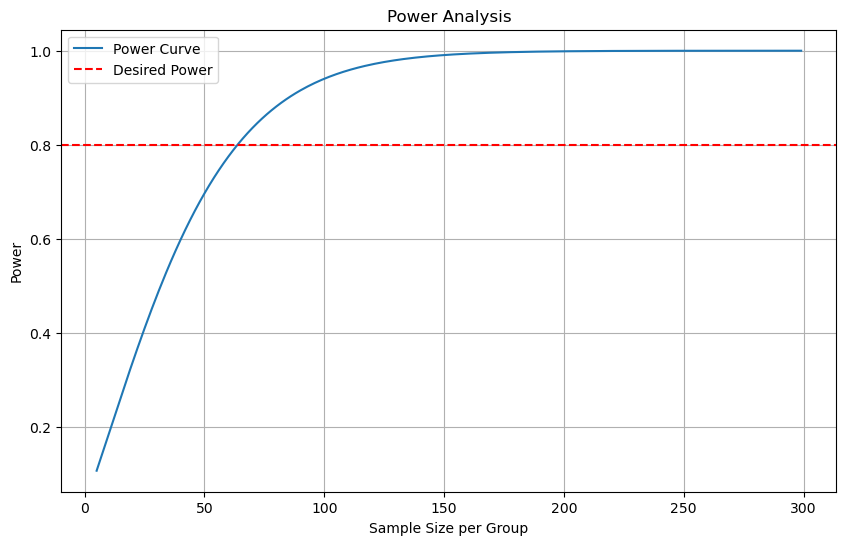

In [42]:
import matplotlib.pyplot as plt

# Range of sample sizes
n_values = np.arange(5, 300)
effect_size = 0.5  # Medium effect size (Cohen's d)
alpha = 0.05       # Significance level
power = 0.8        # Desired power (80%)

power_values = [calculate_power(n, effect_size, alpha) for n in n_values]

plt.figure(figsize=(10, 6))
plt.plot(n_values, power_values, label='Power Curve')
plt.axhline(y=desired_power, color='r', linestyle='--', label='Desired Power')
plt.xlabel('Sample Size per Group')
plt.ylabel('Power')
plt.title('Power Analysis')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import seaborn as sns

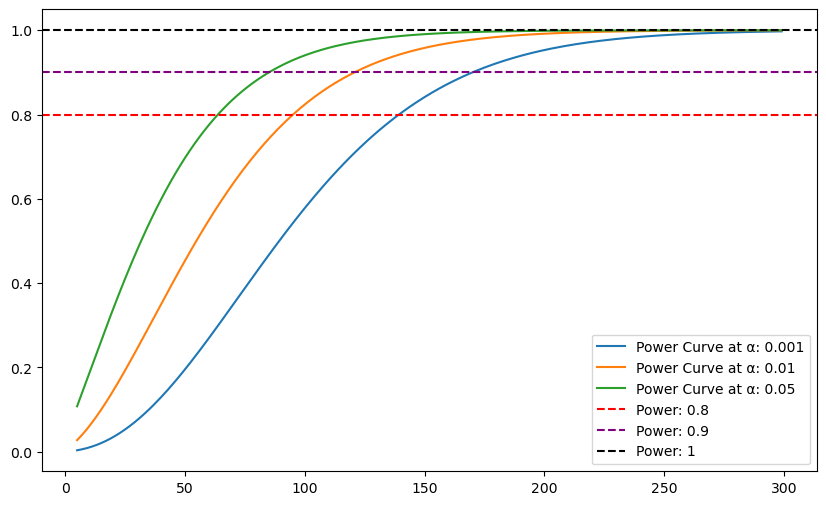

In [17]:
n_values = np.arange(5, 300)

plt.figure(figsize=(10, 6))

for i, alpha in enumerate([.001, .01, .05,]):

    power_values = [calculate_power(n, effect_size, alpha) for n in n_values]

    plt.plot(n_values, power_values, color=sns.color_palette()[i], label=f'Power Curve at α: {alpha}')


for powcol, power in [('red',.8),('purple',.9),('black',1)]:

    plt.axhline(y=power, color=powcol, linestyle='--', label=f'Power: {power}')

plt.legend()    
plt.show()    



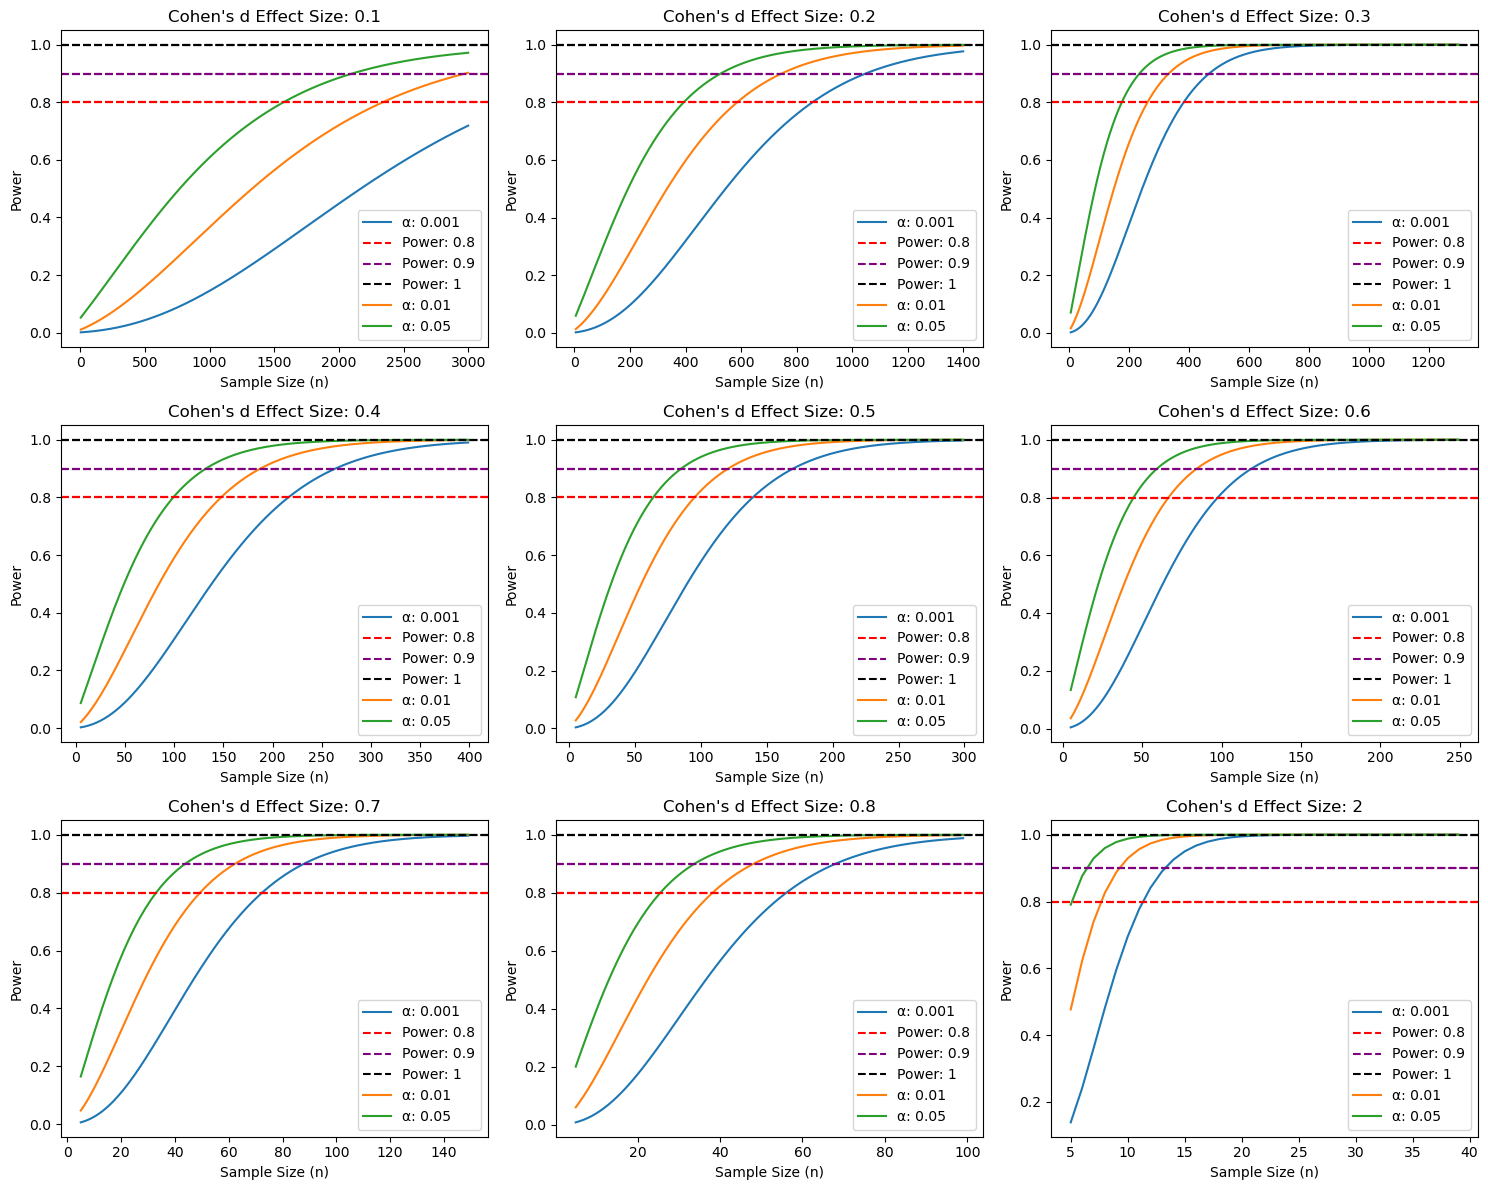

In [41]:
# Define the range of sample sizes
n_values = np.arange(5, 1500)

# Define 9 effect sizes (small, medium, large)
effect_sizes = [(0.1, 3000),
                (0.2, 1400),
                (0.3, 1300),
                (0.4, 400),
                (0.5, 300),
                (0.6, 250),
                (0.7, 150),
                (0.8, 100),
                (2, 40)                ]

# Define alpha values
alphas = [0.001, 0.01, 0.05]

# Set up the grid (3x3 subplots)
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

# Iterate over rows and columns, filling each subplot with a different effect size
for idx, (effect_size, n_values) in enumerate(effect_sizes):
    row = idx // 3
    col = idx % 3
    
    ax = axs[row, col]
    
    n_values = np.arange(5, n_values)
    # Iterate over alpha levels
    for i, alpha in enumerate(alphas):
        # Calculate power values for each sample size
        power_values = [calculate_power(n, effect_size, alpha) for n in n_values]
        
        # Plot the power curve
        ax.plot(n_values, power_values, color=sns.color_palette()[i], label=f'α: {alpha}')
        
        # Add horizontal lines for power thresholds (0.8, 0.9, 1.0)
        for powcol, power in [('red', .8), ('purple', .9), ('black', 1)]:
            ax.axhline(y=power, color=powcol, linestyle='--', label=f'Power: {power}' if i == 0 else "")

    # Add labels and title for each subplot
    ax.set_title(f"Cohen's d Effect Size: {effect_size}")
    ax.set_xlabel('Sample Size (n)')
    ax.set_ylabel('Power')
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()